In [1]:
pip install -u pandas-datareader

Note: you may need to restart the kernel to use updated packages.



Usage:   
  C:\Users\dan.marks\Anaconda3\envs\mlenv\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  C:\Users\dan.marks\Anaconda3\envs\mlenv\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  C:\Users\dan.marks\Anaconda3\envs\mlenv\python.exe -m pip install [options] [-e] <vcs project url> ...
  C:\Users\dan.marks\Anaconda3\envs\mlenv\python.exe -m pip install [options] [-e] <local project path> ...
  C:\Users\dan.marks\Anaconda3\envs\mlenv\python.exe -m pip install [options] <archive url/path> ...

no such option: -u


In [2]:
pip install statsmodels 

Note: you may need to restart the kernel to use updated packages.


In [2]:
# import librarys
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import os
import time
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
plt.style.use('seaborn')

## Getting Data from Yahoo Finance

In [4]:
#get Microsoft stock price
msftdf = web.DataReader('msft', data_source='yahoo', start='2019-01-01', end='2021-05-01')

msftdf

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,101.750000,98.940002,99.550003,101.120003,35329300.0,98.375481
2019-01-03,100.190002,97.199997,100.099998,97.400002,42579100.0,94.756454
2019-01-04,102.510002,98.930000,99.720001,101.930000,44060600.0,99.163513
2019-01-07,103.269997,100.980003,101.639999,102.059998,35656100.0,99.289970
2019-01-08,103.970001,101.709999,103.040001,102.800003,31514400.0,100.009888
...,...,...,...,...,...,...
2021-04-26,262.440002,260.170013,261.660004,261.549988,19763300.0,261.549988
2021-04-27,263.190002,260.119995,261.579987,261.970001,31014200.0,261.970001
2021-04-28,256.540009,252.949997,256.079987,254.559998,46903100.0,254.559998


In [5]:
#get Facebook stock price
fbdf = web.DataReader('FB', data_source='yahoo', start='2019-01-01', end='2021-05-01')

fbdf

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,137.509995,128.559998,128.990005,135.679993,28146200,135.679993
2019-01-03,137.169998,131.119995,134.690002,131.740005,22717900,131.740005
2019-01-04,138.000000,133.750000,134.009995,137.949997,29002100,137.949997
2019-01-07,138.869995,135.910004,137.559998,138.050003,20089300,138.050003
2019-01-08,143.139999,139.539993,139.889999,142.529999,26263800,142.529999
...,...,...,...,...,...,...
2021-04-26,305.799988,301.559998,303.339996,303.040009,16172600,303.040009
2021-04-27,305.339996,301.109985,304.279999,303.570007,15309300,303.570007
2021-04-28,310.920013,305.369995,307.359985,307.100006,33907200,307.100006


In [6]:
#get Apple stock price
aapldf = web.DataReader('AAPL', data_source='yahoo', start='2019-01-01', end='2021-05-01')

aapldf

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,39.712502,38.557499,38.722500,39.480000,148158800.0,38.439735
2019-01-03,36.430000,35.500000,35.994999,35.547501,365248800.0,34.610851
2019-01-04,37.137501,35.950001,36.132500,37.064999,234428400.0,36.088364
2019-01-07,37.207500,36.474998,37.174999,36.982498,219111200.0,36.008041
2019-01-08,37.955002,37.130001,37.389999,37.687500,164101200.0,36.694466
...,...,...,...,...,...,...
2021-04-26,135.059998,133.559998,134.830002,134.720001,66905100.0,134.491562
2021-04-27,135.410004,134.110001,135.009995,134.389999,66015800.0,134.162109
2021-04-28,135.020004,133.080002,134.309998,133.580002,107760100.0,133.353485


In [7]:
#get Google stock price
googdf = web.DataReader('GOOGL', data_source='yahoo', start='2019-01-01', end='2021-05-01')

googdf

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,1060.790039,1025.280029,1027.199951,1054.680054,1593400,1054.680054
2019-01-03,1066.260010,1022.369995,1050.670044,1025.469971,2098000,1025.469971
2019-01-04,1080.000000,1036.859985,1042.560059,1078.069946,2301100,1078.069946
2019-01-07,1082.699951,1062.640015,1080.969971,1075.920044,2372300,1075.920044
2019-01-08,1093.349976,1068.349976,1086.000000,1085.369995,1770700,1085.369995
...,...,...,...,...,...,...
2021-04-26,2324.530029,2297.320068,2304.520020,2309.929932,1601900,2309.929932
2021-04-27,2318.449951,2286.159912,2317.629883,2290.979980,2219300,2290.979980
2021-04-28,2431.379883,2353.219971,2392.500000,2359.040039,4055300,2359.040039


In [8]:
#get Amazon stock price
amzndf = web.DataReader('AMZN', data_source='yahoo', start='2019-01-01', end='2021-05-01')

amzndf

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,1553.359985,1460.930054,1465.199951,1539.130005,7983100,1539.130005
2019-01-03,1538.000000,1497.109985,1520.010010,1500.280029,6975600,1500.280029
2019-01-04,1594.000000,1518.310059,1530.000000,1575.390015,9182600,1575.390015
2019-01-07,1634.560059,1589.189941,1602.310059,1629.510010,7993200,1629.510010
2019-01-08,1676.609985,1616.609985,1664.689941,1656.579956,8881400,1656.579956
...,...,...,...,...,...,...
2021-04-26,3428.449951,3330.939941,3348.000000,3409.000000,4880700,3409.000000
2021-04-27,3460.000000,3398.010010,3443.469971,3417.429932,3827100,3417.429932
2021-04-28,3489.879883,3425.000000,3434.800049,3458.500000,4631900,3458.500000


## Visualizing the Data

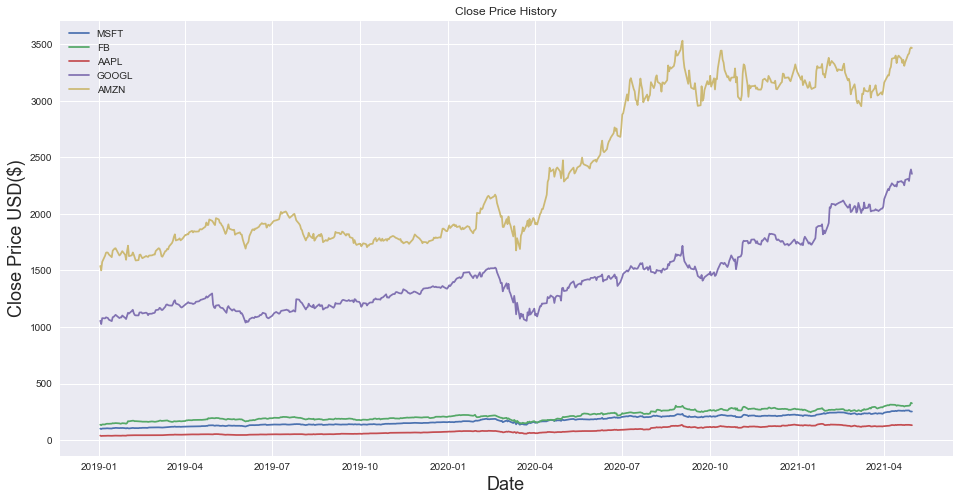

In [9]:
#plot close prices
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(msftdf['Close'], label='MSFT')
plt.plot(fbdf['Close'], label='FB')
plt.plot(aapldf['Close'], label='AAPL')
plt.plot(googdf['Close'], label='GOOGL')
plt.plot(amzndf['Close'], label='AMZN')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.legend()

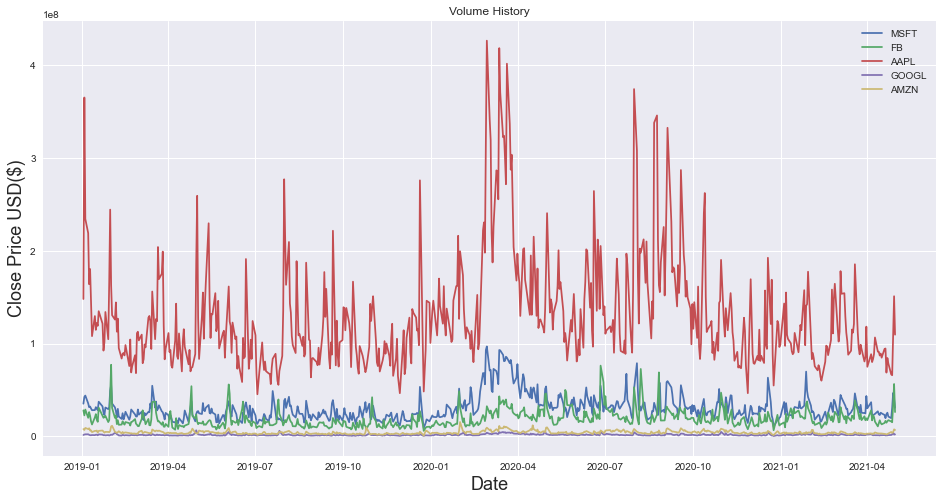

In [10]:
plt.figure(figsize=(16,8))
plt.title('Volume History')
plt.plot(msftdf['Volume'], label='MSFT')
plt.plot(fbdf['Volume'], label='FB')
plt.plot(aapldf['Volume'], label='AAPL')
plt.plot(googdf['Volume'], label='GOOGL')
plt.plot(amzndf['Volume'], label='AMZN')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.legend()

In [11]:
#creating new column = 'Total Traded' which is close price * volume 

In [11]:
msftdf['Total Traded'] = msftdf['Close']*msftdf['Volume']
fbdf['Total Traded'] = fbdf['Close']*fbdf['Volume']
aapldf['Total Traded'] = aapldf['Close']*aapldf['Volume']
amzndf['Total Traded'] = amzndf['Close']*amzndf['Volume']
googdf['Total Traded'] = googdf['Close']*googdf['Volume']

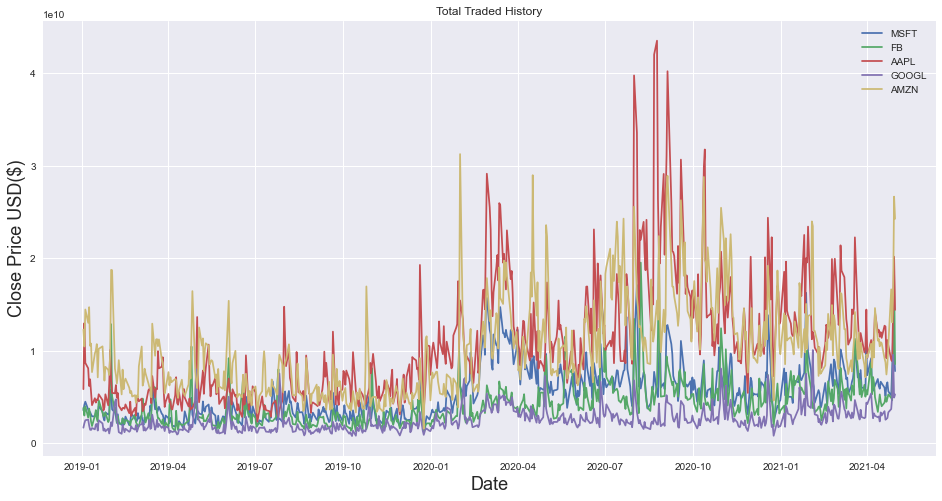

In [12]:
plt.figure(figsize=(16,8))
plt.title('Total Traded History')
plt.plot(msftdf['Total Traded'], label='MSFT')
plt.plot(fbdf['Total Traded'], label='FB')
plt.plot(aapldf['Total Traded'], label='AAPL')
plt.plot(googdf['Total Traded'], label='GOOGL')
plt.plot(amzndf['Total Traded'], label='AMZN')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.legend()

## Getting started with ARIMA

##### First ARIMA model without splitting data

In [13]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

In [14]:
#check length of df
len(msftdf)

587

In [15]:
#making arima model with pdq as 1,1,1 without fitting data

model = ARIMA(msftdf['Close'].fillna(value=msftdf['Close'].mean()),order=(6,1,6))
model_fit= model.fit()
model_fit.params
result= model.fit(disp=False)

C:\Users\dan.marks\Anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\dan.marks\Anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but 

In [16]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                  586
Model:                 ARIMA(6, 1, 6)   Log Likelihood               -1526.728
Method:                       css-mle   S.D. of innovations              3.273
Date:                Fri, 14 May 2021   AIC                           3081.455
Time:                        23:02:55   BIC                           3142.682
Sample:                             1   HQIC                          3105.315
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2578      0.115      2.251      0.024       0.033       0.482
ar.L1.D.Close     0.2130      0.370      0.576      0.565      -0.512       0.938
ar.L2.D.Close     0.4765      0.433      1.100      0.271      -0.372       1.325
ar.L3.D.Close    -0.7565      0.328     -2.306      0.021      -1.400      -0.113
ar.L4.D.Close    -0.2712      0.195     -1.394      0.163      -0.653       0.110
ar.L5.D.Close     0.2356      0.446      0.528      0.598      -0.639       1.110
ar.L6.D.Close    -0.4777      0.276     -1.728      0.084      -1.020       0.064
ma.L1.D.Close    -0.4820      0.366     -1.315      0.188      -1.200       0.236
ma.L2.D.Close    -0.3378      0.342     -0.986      0.324      -1.009       0.333
ma.L3.D.Close     0.9188      0.426      2.156      0.031       0.083       1.754
ma.L4.D.Close    -0.0181      0.131     -0.139      0.890      -0.274       0.238
ma.L5.D.Close    -0.2621      0.416     -0.630      0.528      -1.077       0.553
ma.L6.D.Close     0.5200      0.110      4.731      0.000       0.305       0.735
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9666           -0.3869j            1.0411           -0.4394
AR.2           -0.9666           +0.3869j            1.0411            0.4394
AR.3            0.8241           -0.6062j            1.0231           -0.1009
AR.4            0.8241           +0.6062j            1.0231            0.1009
AR.5            0.3890           -1.3015j            1.3584           -0.2038
AR.6            0.3890           +1.3015j            1.3584            0.2038
MA.1           -1.0311           -0.3864j            1.1011           -0.4429
MA.2           -1.0311           +0.3864j            1.1011            0.4429
MA.3            0.8417           -0.5887j            1.0271           -0.0971
MA.4            0.8417           +0.5887j            1.0271            0.0971
MA.5            0.4414           -1.1439j            1.2262           -0.1914
MA.6            0.4414           +1.1439j            1.2262            0.1914
-----------------------------------------------------------------------------
"""

In [17]:
#use ARIMA predict function to apply predictions to variable = y_predict
y_predict = model_fit.predict(typ='levels')
print(y_predict)


Date
2019-01-03    101.377782
2019-01-04     98.822754
2019-01-07    100.886739
2019-01-08    102.290802
2019-01-09    103.196876
                 ...    
2021-04-26    260.176421
2021-04-27    261.565381
2021-04-28    262.493649
2021-04-29    257.018412
2021-04-30    253.592562
Length: 586, dtype: float64


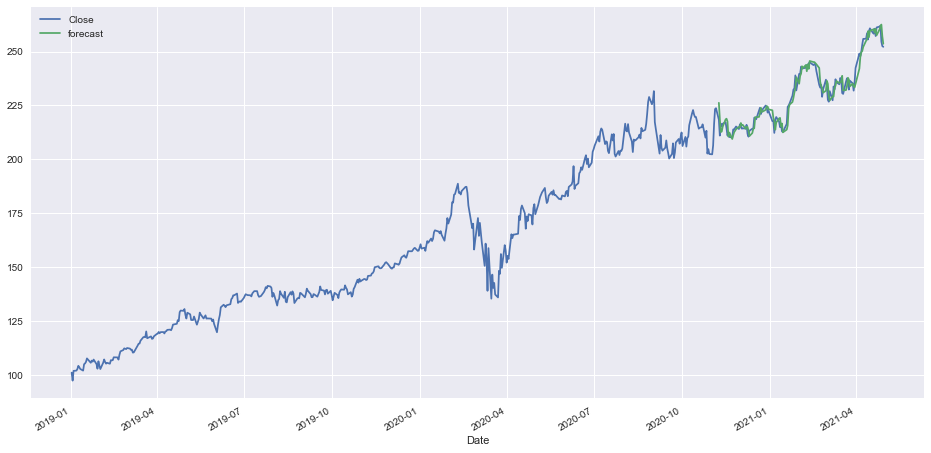

In [52]:
msftdf['forecast']= model_fit.predict(start=468,typ='levels')
msftdf[['Close', 'forecast']].plot(figsize=(16,8))
#save fig
plt.savefig("notfit_ARIMA_MSFT.png",)

plt.show()

In [19]:
#check MSE score
nosplit_mse = mean_squared_error(msftdf['Close'][1:len(msftdf)],y_predict)

mean_squared_error(msftdf['Close'][1:len(msftdf)],y_predict)


10.717108882420142

###### ARIMA with split of y_train and y_test 

In [20]:
#get close data alone

msftdf = msftdf[['Close']].copy()
msftdf.info

<bound method DataFrame.info of                  Close
Date                  
2019-01-02  101.120003
2019-01-03   97.400002
2019-01-04  101.930000
2019-01-07  102.059998
2019-01-08  102.800003
...                ...
2021-04-26  261.549988
2021-04-27  261.970001
2021-04-28  254.559998
2021-04-29  252.509995
2021-04-30  252.179993

[587 rows x 1 columns]>

In [22]:
#split data into test and split at .80 (of )
y_train = msftdf.iloc[:468]
y_test = msftdf.iloc[468:]

In [23]:
y_train.tail()

,Close
Date,
2020-11-02,202.330002
2020-11-03,206.429993
2020-11-04,216.389999
2020-11-05,223.289993
2020-11-06,223.720001


In [24]:
y_test.head()

,Close
Date,
2020-11-09,218.389999
2020-11-10,211.009995
2020-11-11,216.550003
2020-11-12,215.440002
2020-11-13,216.509995


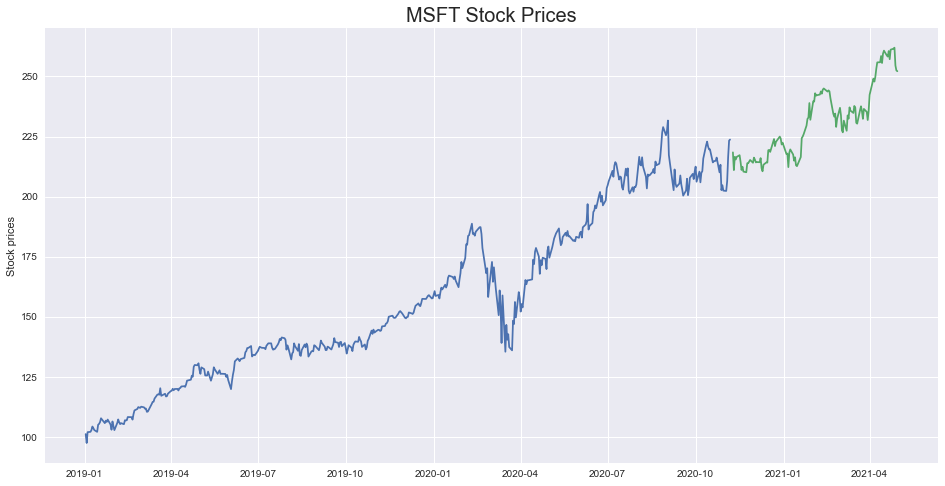

In [51]:
#plot train and test
plt.figure(figsize=(16,8))
plt.plot(y_train,label='Train')
plt.plot(y_test,label='Actual')
plt.ylabel("Stock prices")
plt.title('MSFT Stock Prices',fontsize=20)
plt.show()

In [26]:
print("start:",y_test.index.min())
print("end:",y_test.index.max())

start: 2020-11-09 00:00:00
end: 2021-04-30 00:00:00


In [27]:
y_test.shape

(119, 1)

In [28]:
y_train.shape

(468, 1)

In [32]:
arima = ARIMA(y_train,order=(6,1,3)).fit(disp=False)
y_arima = arima.predict(468,586,typ='levels')
y_arima.index = y_test.index

C:\Users\dan.marks\Anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\dan.marks\Anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\dan.marks\Anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace fra

In [33]:
#Check MSE of model
arima_mse = mse(y_arima,y_test)

mse(y_arima,y_test)


112.93900383704435

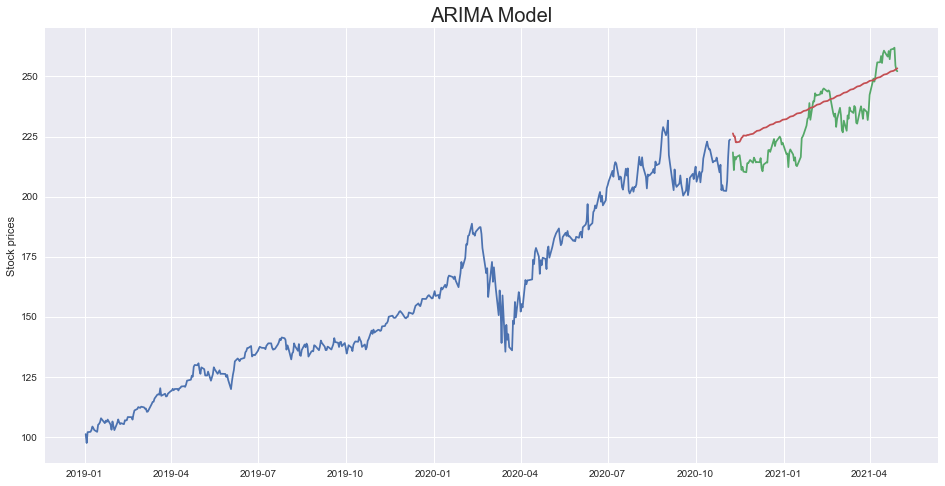

In [34]:
#Plot ARIMA model

plt.figure(figsize=(16,8))
plt.plot(y_train,label='Train')
plt.plot(y_test,label='Actual')
plt.plot(y_arima,label='ARIMA Predict')
plt.ylabel("Stock prices")
plt.title('ARIMA Model',fontsize=20)
#save fig
plt.savefig("ARIMA_MSFT.png",)

plt.show()

## Checking ARMA Model

In [35]:
from statsmodels.tsa.arima_model import ARMA

In [45]:
arma = ARMA(y_train,order=(1,1)).fit()
y_arma =arma.predict(468,586)
y_arma.index = y_test.index

C:\Users\dan.marks\Anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\dan.marks\Anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but 

In [46]:
#Check MSE of model
arma_mse = mse(y_arma,y_test)

mse(y_arma,y_test)

446.95340173005246

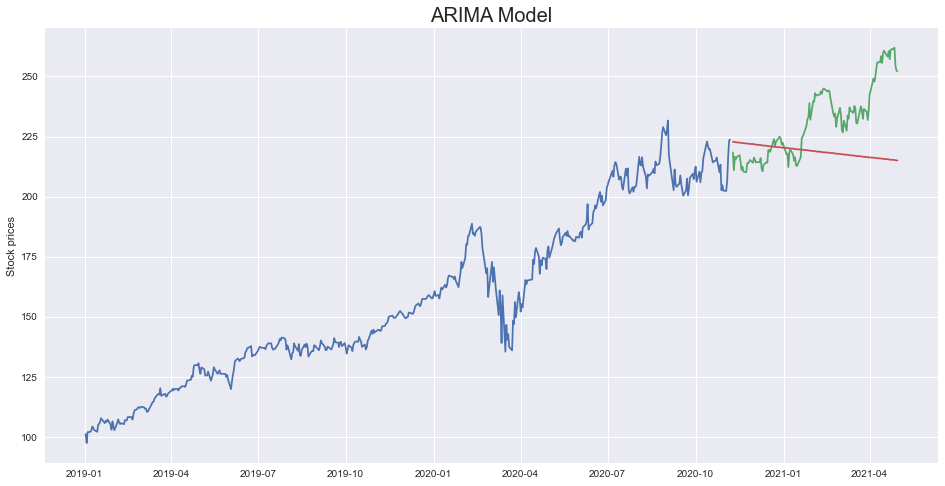

In [47]:
plt.figure(figsize=(16,8))
plt.plot(y_train,label='Train')
plt.plot(y_test,label='Actual')
plt.plot(y_arma,label='ARIMA Predict')
plt.ylabel("Stock prices")
plt.title('ARIMA Model',fontsize=20)
#save fig
plt.savefig("ARMA_MSFT.png",)

plt.show()

### Visualize results

In [48]:
import pandas as pd

In [49]:
mse_df = DataFrame[nosplit_mse, arima_mse, arma_mse]

mse_df.head()

NameError: name 'DataFrame' is not defined

In [50]:
df = pd.Dataframe({'Ticker':['MSFT', 'MSFT', 'MSFT'],
                       'Model':['No Split', 'Arima', 'ARMA'],
                    'MSE Score':[nosplit_mse, arima_mse, arma_mse],})
                   
df

AttributeError: module 'pandas' has no attribute 'Dataframe'